In [ ]:
import pandas as pd

# Load the Excel file
df = pd.read_excel("timeline_worldwide.xlsx")

# List of your 7 drama names in order
dramas = ["KinnPorsche", "2gether", "The Eclipse", "TharnType", "Cutie Pie", "Only Friends", "The Heart Killers"]

# Create an empty DataFrame to store cleaned data
clean_data = pd.DataFrame(columns=["Week", "Drama", "Score"])

# Loop through pairs of columns (Week + Score)
for i in range(0, len(df.columns), 2):
    week_col = df.columns[i]
    score_col = df.columns[i + 1]

    if i // 2 >= len(dramas):  # Avoid IndexError
        break

    drama_name = dramas[i // 2]
    
    # Select and rename
    temp_df = df[[week_col, score_col]].copy()
    temp_df.columns = ["Week", "Score"]
    temp_df["Drama"] = drama_name

    clean_data = pd.concat([clean_data, temp_df], ignore_index=True)

# Drop empty or null rows
clean_data.dropna(inplace=True)

# Save cleaned file
clean_data.to_excel("cleaned_drama_trends.xlsx", index=False)


C:\Users\lekha\AppData\Local\Temp\ipykernel_25644\2546294975.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_scores.index, y=avg_scores.values, palette="pastel")


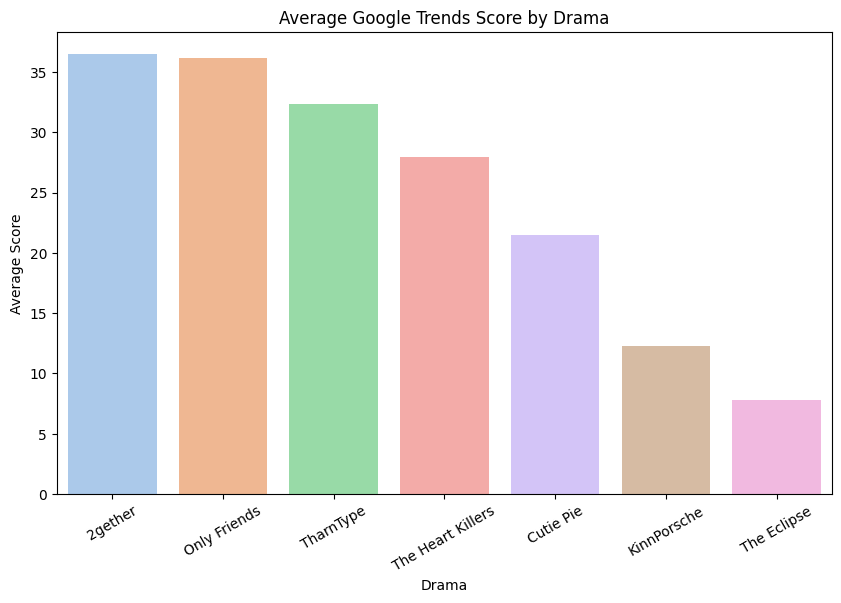

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns
avg_scores = clean_data.groupby("Drama")["Score"].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_scores.index, y=avg_scores.values, palette="pastel")
plt.title("Average Google Trends Score by Drama")
plt.ylabel("Average Score")
plt.xticks(rotation=30)
plt.show()


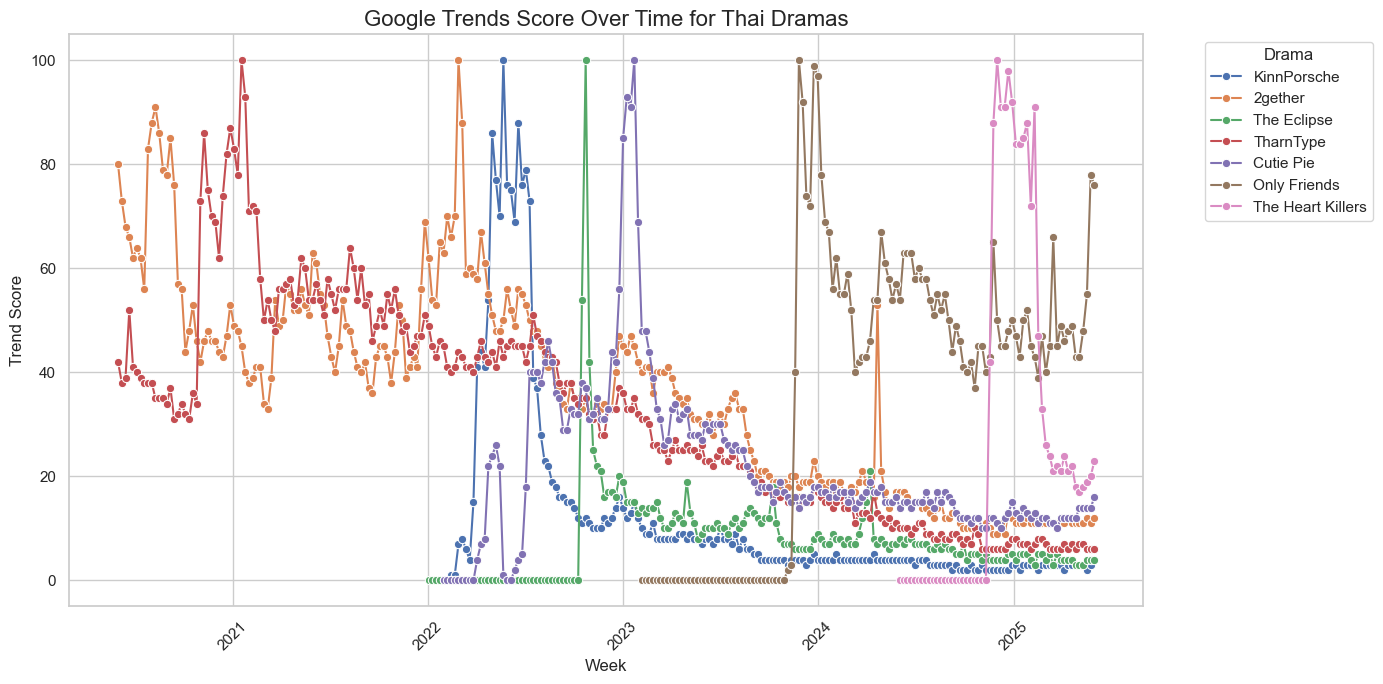

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot size and style
plt.figure(figsize=(14, 7))
sns.set(style="whitegrid")

# Convert Week to datetime
clean_data['Week'] = pd.to_datetime(clean_data['Week'])

# Plot
sns.lineplot(data=clean_data, x="Week", y="Score", hue="Drama", marker="o")

# Formatting
plt.title("Google Trends Score Over Time for Thai Dramas", fontsize=16)
plt.xlabel("Week")
plt.ylabel("Trend Score")
plt.xticks(rotation=45)
plt.legend(title="Drama", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [10]:
import pandas as pd

# Read CSV without headers because headers repeat
df = pd.read_excel("drmascoreboard_geomap.xlsx", header=None)

# Your first row contains drama names and 'Country' repeated
first_row = df.iloc[0].tolist()

# Drama names are in every 2nd column starting at 1 (index 1, 3, 5, ...)
# Country label is in every even column (index 0, 2, 4, ...)
# But the first column in data rows is the country name for the first drama

# Extract drama names from header row (every second column starting from index 1)
drama_names = first_row[1::2]

# Create an empty list to store individual dataframes for each drama
dfs = []

# Loop through each drama and get corresponding columns (country + score)
for i, drama in enumerate(drama_names):
    country_col = 2 * i    # country columns: 0, 2, 4, ...
    score_col = country_col + 1  # score columns: 1, 3, 5, ...
    
    # Extract relevant columns, skipping header row (index 0)
    temp_df = df.iloc[1:, [country_col, score_col]].copy()
    
    # Rename columns for clarity
    temp_df.columns = ['Country', 'Score']
    
    # Add drama name column
    temp_df['Drama'] = drama
    
    # Append to list
    dfs.append(temp_df)

# Concatenate all drama dataframes vertically
result = pd.concat(dfs, ignore_index=True)

# Optional: Clean missing scores or countries if any
result = result.dropna(subset=['Country', 'Score'])

# Reset index
result = result.reset_index(drop=True)

print(result.head())


     Country Score        Drama
0       Laos   100  KinnPorsche
1      Nepal    65  KinnPorsche
2  Sri Lanka    59  KinnPorsche
3   Thailand    54  KinnPorsche
4    Vietnam    47  KinnPorsche


In [11]:
result

,Country,Score,Drama
0,Laos,100,KinnPorsche
1,Nepal,65,KinnPorsche
2,Sri Lanka,59,KinnPorsche
3,Thailand,54,KinnPorsche
4,Vietnam,47,KinnPorsche
...,...,...,...
557,Greece,4,The Heart Killers
558,Belarus,4,The Heart Killers
559,Russia,4,The Heart Killers
560,South Korea,2,The Heart Killers


In [13]:
# Drop empty or null rows
result.dropna(inplace=True)

# Save cleaned file
result.to_excel("cleaned_map_trends.xlsx", index=False)

In [16]:
import pandas as pd

# Load the second sheet
df = pd.read_excel("drmascoreboard_geomap.xlsx", sheet_name=1, header=None)

# Define drama names (manually matched to the structure)
drama_names = [
    "KinnPorsche", "2gether", "The Eclipse", "TharnType",
    "Cutie Pie", "Only Friends", "The Heart Killers"
]

# Prepare long-format dataframe
records = []

for i, drama in enumerate(drama_names):
    region_col = i * 2      # 0, 2, 4, ...
    score_col = i * 2 + 1   # 1, 3, 5, ...
    
    for j in range(len(df)):
        region = df.iloc[j, region_col]
        score = df.iloc[j, score_col]
        if pd.notna(region) and pd.notna(score):
            records.append({
                "Region": region,
                "Drama": drama,
                "Score": score
            })

# Convert to DataFrame
tidy_df = pd.DataFrame(records)

# View it
print(tidy_df.head())

# Optional: Save it
tidy_df.to_csv("Sheet2_cleaned.csv", index=False)


              Region        Drama        Score
0             Region  KinnPorsche  kinnporsche
1            Mizoram  KinnPorsche          100
2           Nagaland  KinnPorsche           85
3  Arunachal Pradesh  KinnPorsche           79
4             Sikkim  KinnPorsche           67


In [17]:
df = pd.read_csv("timeline_india.csv")
reshaped = pd.DataFrame()

# Loop through all columns starting with 'Week_'
for col in df.columns:
    if col.startswith("Week"):
        series_name = col.replace("Week", "").strip("_ ")
        interest_col = series_name

        if interest_col in df.columns:
            temp = pd.DataFrame({
                "Week": df[col],
                "Series": series_name,
                "Interest": df[interest_col]
            })
            reshaped = pd.concat([reshaped, temp], ignore_index=True)


In [20]:

print(df.columns.tolist())

['Week', 'kinnporsche', 'Week.1', '2gether', 'Week.2', 'The Eclipse', 'Unnamed: 6', 'Week.3', 'TharnType', 'Week.4', 'Cutie Pie', 'Week.5', 'Only Friends', 'Week.6', 'The Heart Killers']


In [21]:
import pandas as pd

# Read your file
df = pd.read_csv("timeline_india.csv")

# Drop the unnamed empty column
df = df.drop(columns=["Unnamed: 6"])

# Prepare a list to store cleaned mini-dfs
cleaned_list = []

# Iterate over every two columns (Week + Series)
for i in range(0, len(df.columns), 2):
    week_col = df.columns[i]
    series_col = df.columns[i+1]
    series_name = df[series_col].name  # Get the BL series name

    temp_df = df[[week_col, series_col]].copy()
    temp_df.columns = ["Week", "Search_Interest"]
    temp_df["Series"] = series_col

    cleaned_list.append(temp_df)

# Combine all into one clean df
final_df = pd.concat(cleaned_list)

# Optional: sort by Series and Week
final_df = final_df.sort_values(by=["Series", "Week"])

# Reset index
final_df = final_df.reset_index(drop=True)

# Save cleaned CSV
final_df.to_csv("cleaned_bl_trends.csv", index=False)

print(final_df.head())


         Week  Search_Interest   Series
0  01-01-2023             70.0  2gether
1  01-05-2022             63.0  2gether
2  01-06-2025             15.0  2gether
3  01-08-2021             23.0  2gether
4  01-09-2024             17.0  2gether
